In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import svd
from numpy.linalg import lstsq
from scipy.spatial.distance import cdist

def clean_matrix(X, tol=1e-14):
    '''
    
    clean small values in a matrix
    '''            
    X[abs(X)<tol] = 0.
    return X

def calculate_svd_solution(A,b):
    U, S, V = svd(A)
    clean_matrix(U)
    clean_matrix(S)
    clean_matrix(V)
    S_inv = np.zeros((A.T.shape))
    for i in range(min(A.T.shape)):
        if S[i] != 0:
            S_inv[i, i] = 1./S[i]
    x = np.matmul(np.transpose(V), np.matmul(S_inv, np.matmul(np.transpose(U), b)))
    return x

def getZ(X, Y, W):
    return W[0]*X+W[1]*Y+W[2]

def smoothness(best_W_list, X, y):
    p = None
    for W in best_W_list:
        best_W = W["W"]
        if p is None:
            p = np.abs(X.dot(best_W)-y)/np.sqrt(best_W[0]**2+best_W[1]**2+1)
        else:
            p = np.concatenate([p, np.abs(X.dot(best_W)-y)/np.sqrt(best_W[0]**2+best_W[1]**2+1)], axis=1)
    p = np.argmin(p, axis=1)
    mean_dist = []
    for i in range(4):
        ids = (p == i)
        best_W = best_W_list[i]["W"]
        mean = np.mean(np.abs(X[ids].dot(best_W)-y[ids])/np.sqrt(best_W[0]**2+best_W[1]**2+1))
        mean_dist.append(mean)
    
    print(mean_dist)
    print(best_W_list[np.argmin(mean_dist)]["W"])

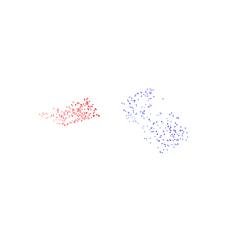

In [7]:
from scipy.stats import ortho_group
R1 = ortho_group.rvs(dim=3)
R2 = ortho_group.rvs(dim=3)
fig = plt.figure()
ax = plt.axes(projection='3d')

clear_table = np.loadtxt("./data/clear_table.txt")
clear_hallway = np.loadtxt("./data/clean_hallway.txt")
selected1 = np.random.choice(clear_table.shape[0], 200)
selected2 = np.random.choice(clear_hallway.shape[0], 200)
clear_table = clear_table[selected1]
clear_hallway = clear_hallway[selected2]
clear_table_ = clear_table.dot(R1)
clear_hallway_ = clear_hallway.dot(R2)
ax = plt.axes(projection='3d')
ax.scatter3D(clear_table_[:,0], clear_table_[:,2], clear_table_[:,1], c='r', s=0.1, label="object 1")
ax.scatter3D(clear_hallway_[:,0], clear_hallway_[:,2], clear_hallway_[:,1], c='b', s=0.1, label="object 2")
plt.axis("off")
plt.savefig("proposal_2.png", bbox_inches="tight")